# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE

In [2]:
%matplotlib inline

In [3]:
# Loading dataset
df = pd.read_csv('wine.csv')

In [4]:
# show dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# This code randomly selects 7 rows from the DataFrame 'df' and returns them as a new DataFrame
df.sample(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
654,8.6,0.47,0.47,2.4,0.074,7.0,29.0,0.9979,3.08,0.46,9.5,5
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5
702,7.0,0.64,0.02,2.1,0.067,9.0,23.0,0.9970,3.47,0.67,9.4,6
609,6.3,0.36,0.19,3.2,0.075,15.0,39.0,0.9956,3.56,0.52,12.7,6
1304,7.6,0.79,0.21,2.3,0.087,21.0,68.0,0.9955,3.12,0.44,9.2,5
359,12.6,0.38,0.66,2.6,0.088,10.0,41.0,1.0010,3.17,0.68,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
""" This code generates a data profile report (in HTML format) for a DataFrame named 'df' using a library like pandas-profiling, 
which provides insights and statistics about the data, and saves it as 'output1.html'."""

prof = ProfileReport(df)
prof.to_file(output_file='output2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# check how data big is or shape of the dataset 
df.shape

(1599, 12)

In [8]:
""" This code provides statistical summary information about the DataFrame 'df,' including measures like count, mean, standard 
deviation, minimum, and maximum values for each numeric column. """

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# check if dataset having null values or not
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# This code counts the occurrences of unique values in the "quality" column of a DataFrame and returns the counts as a Series
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
# This code calculates the correlation between numeric columns in the DataFrame 'df' and returns a correlation matrix
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [13]:
# This code calculates the correlation of each numeric column with the 'quality' column in the DataFrame 'df'
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

# Data Visualization

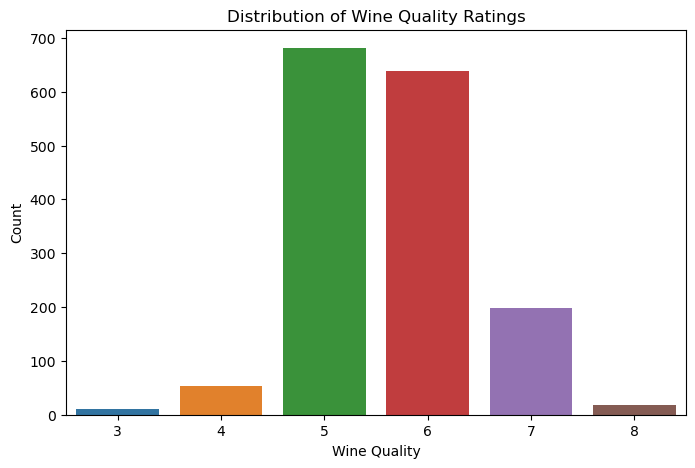

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
"""This code creates a countplot using Seaborn to visualize the distribution of wine quality ratings in the 'df' DataFrame and 
displays the counts of each quality rating along with a title"""

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()
df['quality'].value_counts()

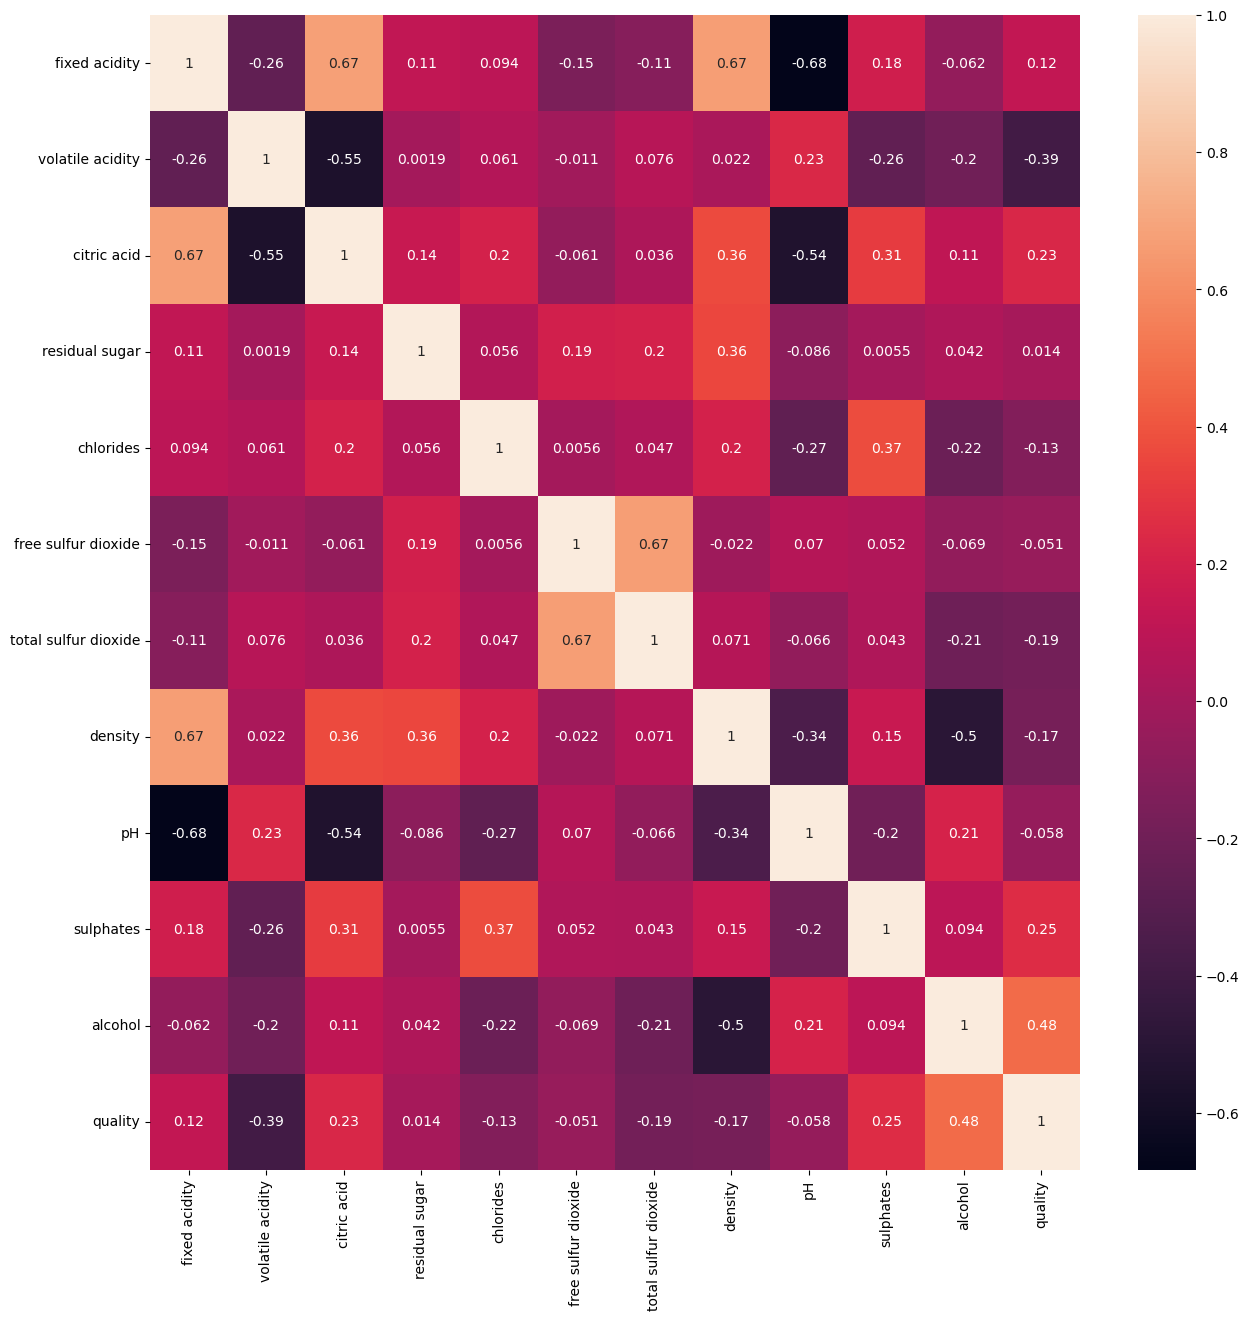

In [15]:
# This code creates a heatmap visualization of the correlation matrix for the DataFrame 'df' 
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

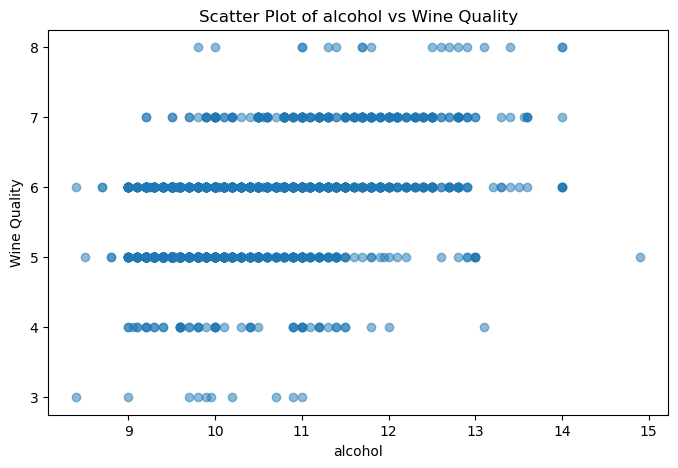

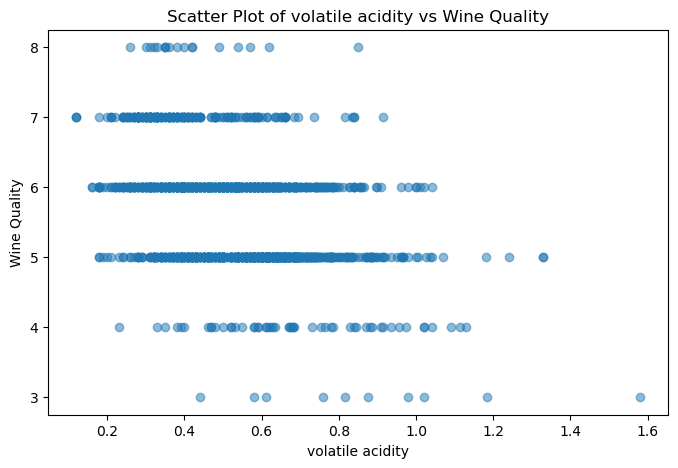

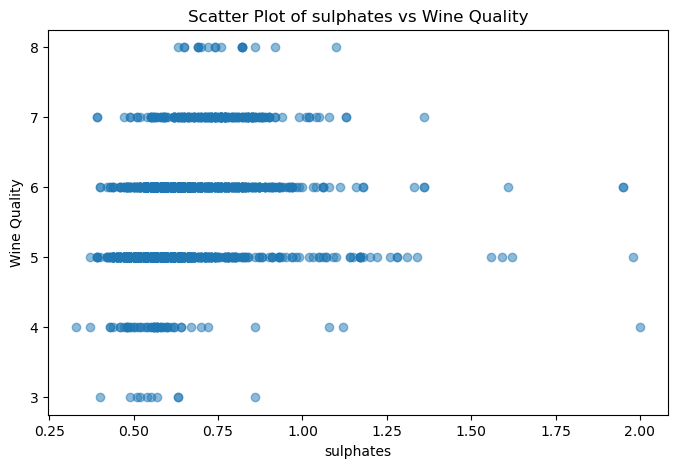

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the features with strong correlations with 'quality'
strong_correlations = correlation_matrix['quality'].abs().sort_values(ascending=False).index[1:]  # Exclude 'quality' itself

# Create scatter plots for the top N features with strong correlations
top_features = strong_correlations[:3]  # Adjust the number as needed

for feature in top_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['quality'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Wine Quality')
    plt.title(f'Scatter Plot of {feature} vs Wine Quality')
    plt.show()

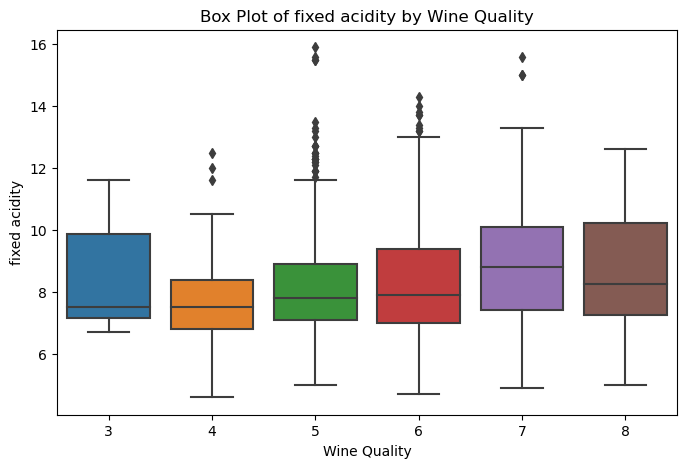

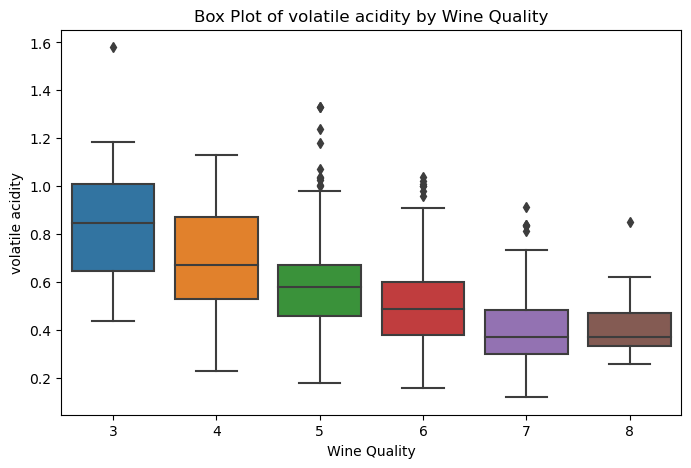

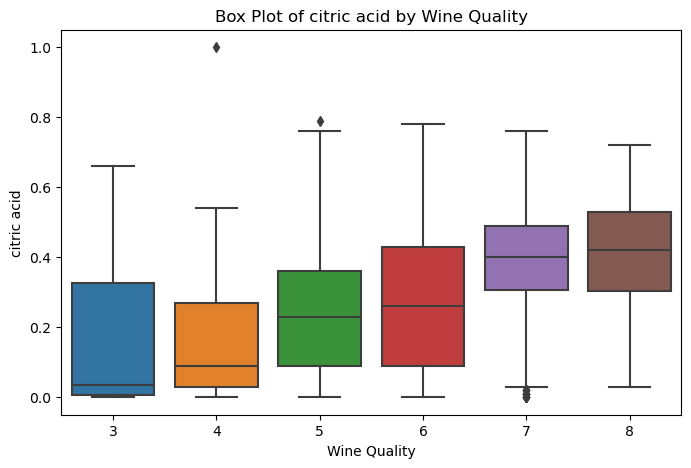

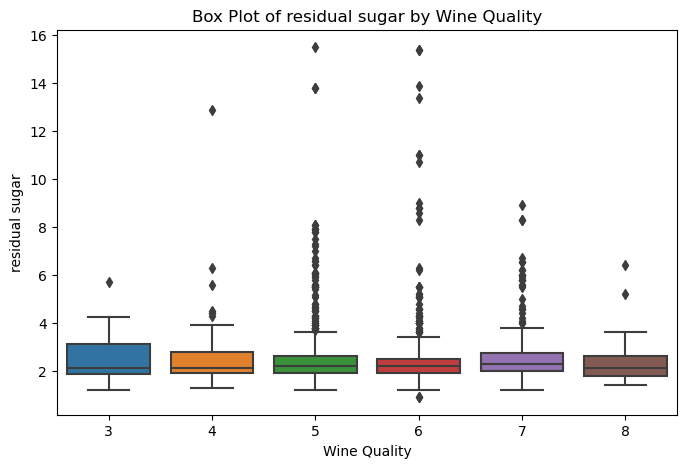

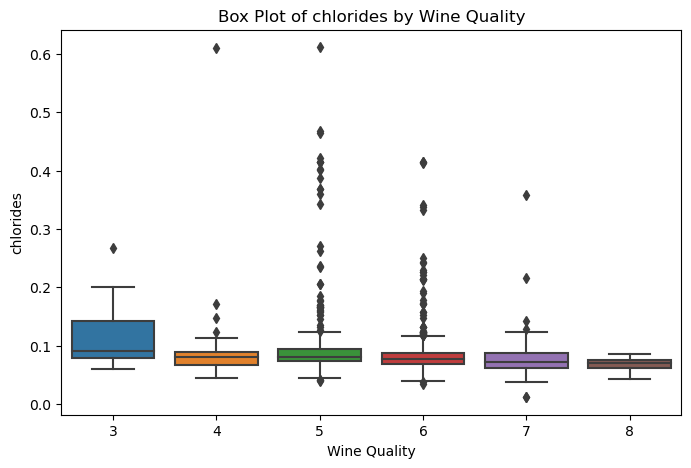

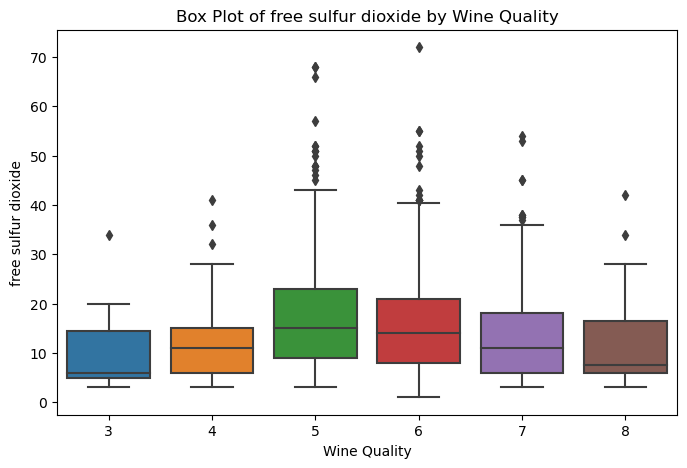

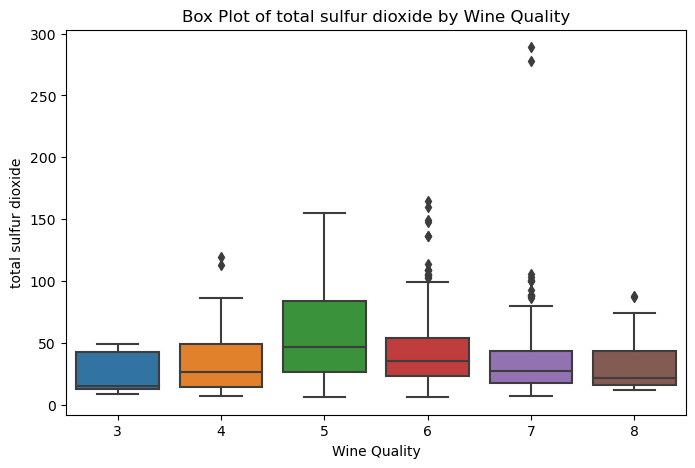

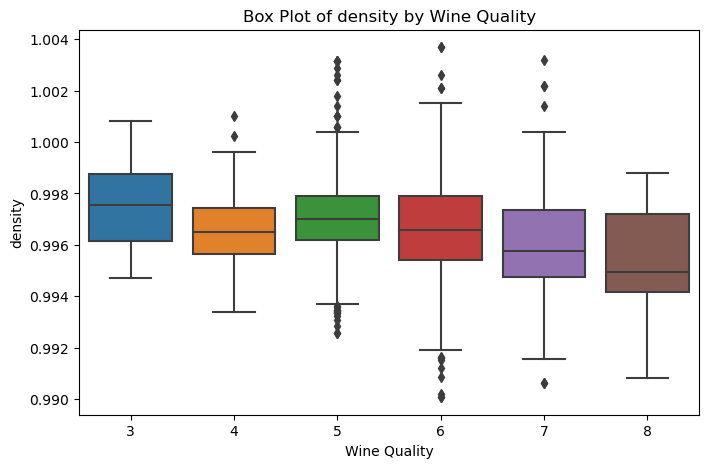

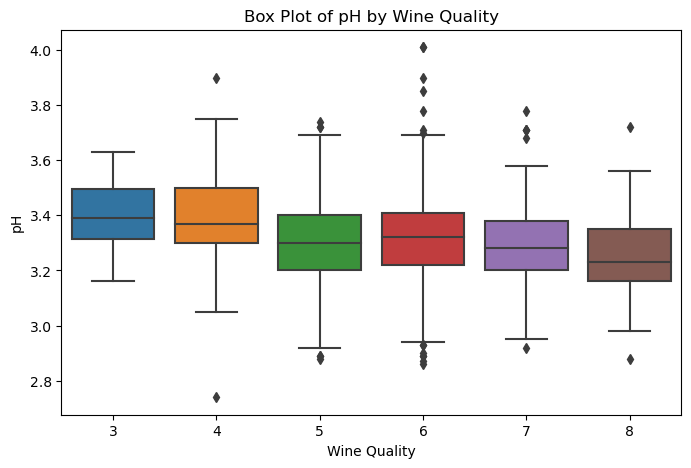

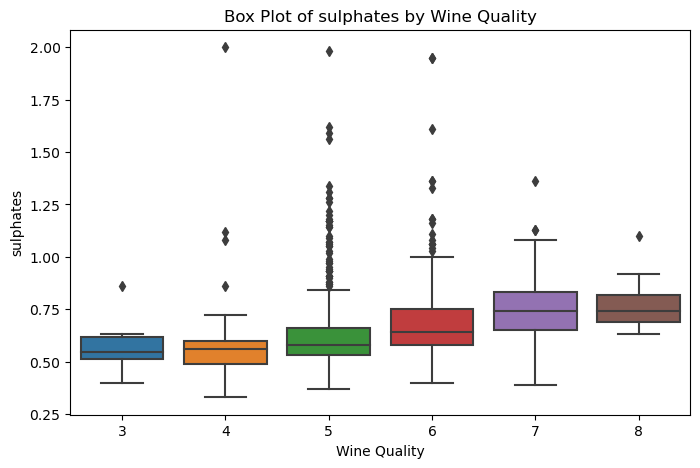

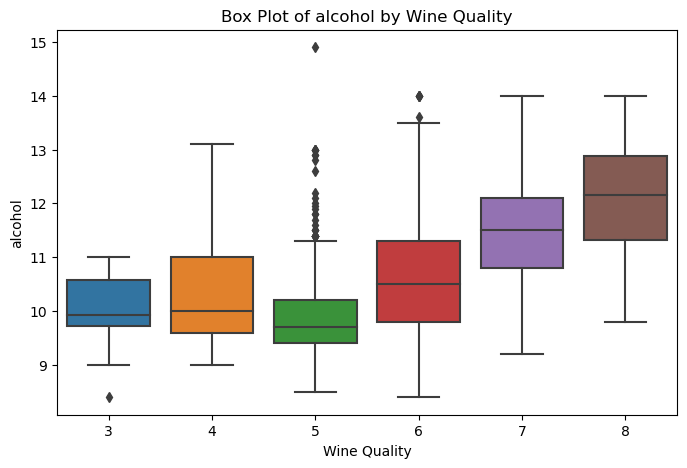

In [17]:
# Define the features you want to create box plots for
features = df.columns[:-1]  # Exclude the 'quality' column

# Create box plots for each feature, grouped by 'quality'
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='quality', y=feature)
    plt.xlabel('Wine Quality')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Wine Quality')
    plt.show()

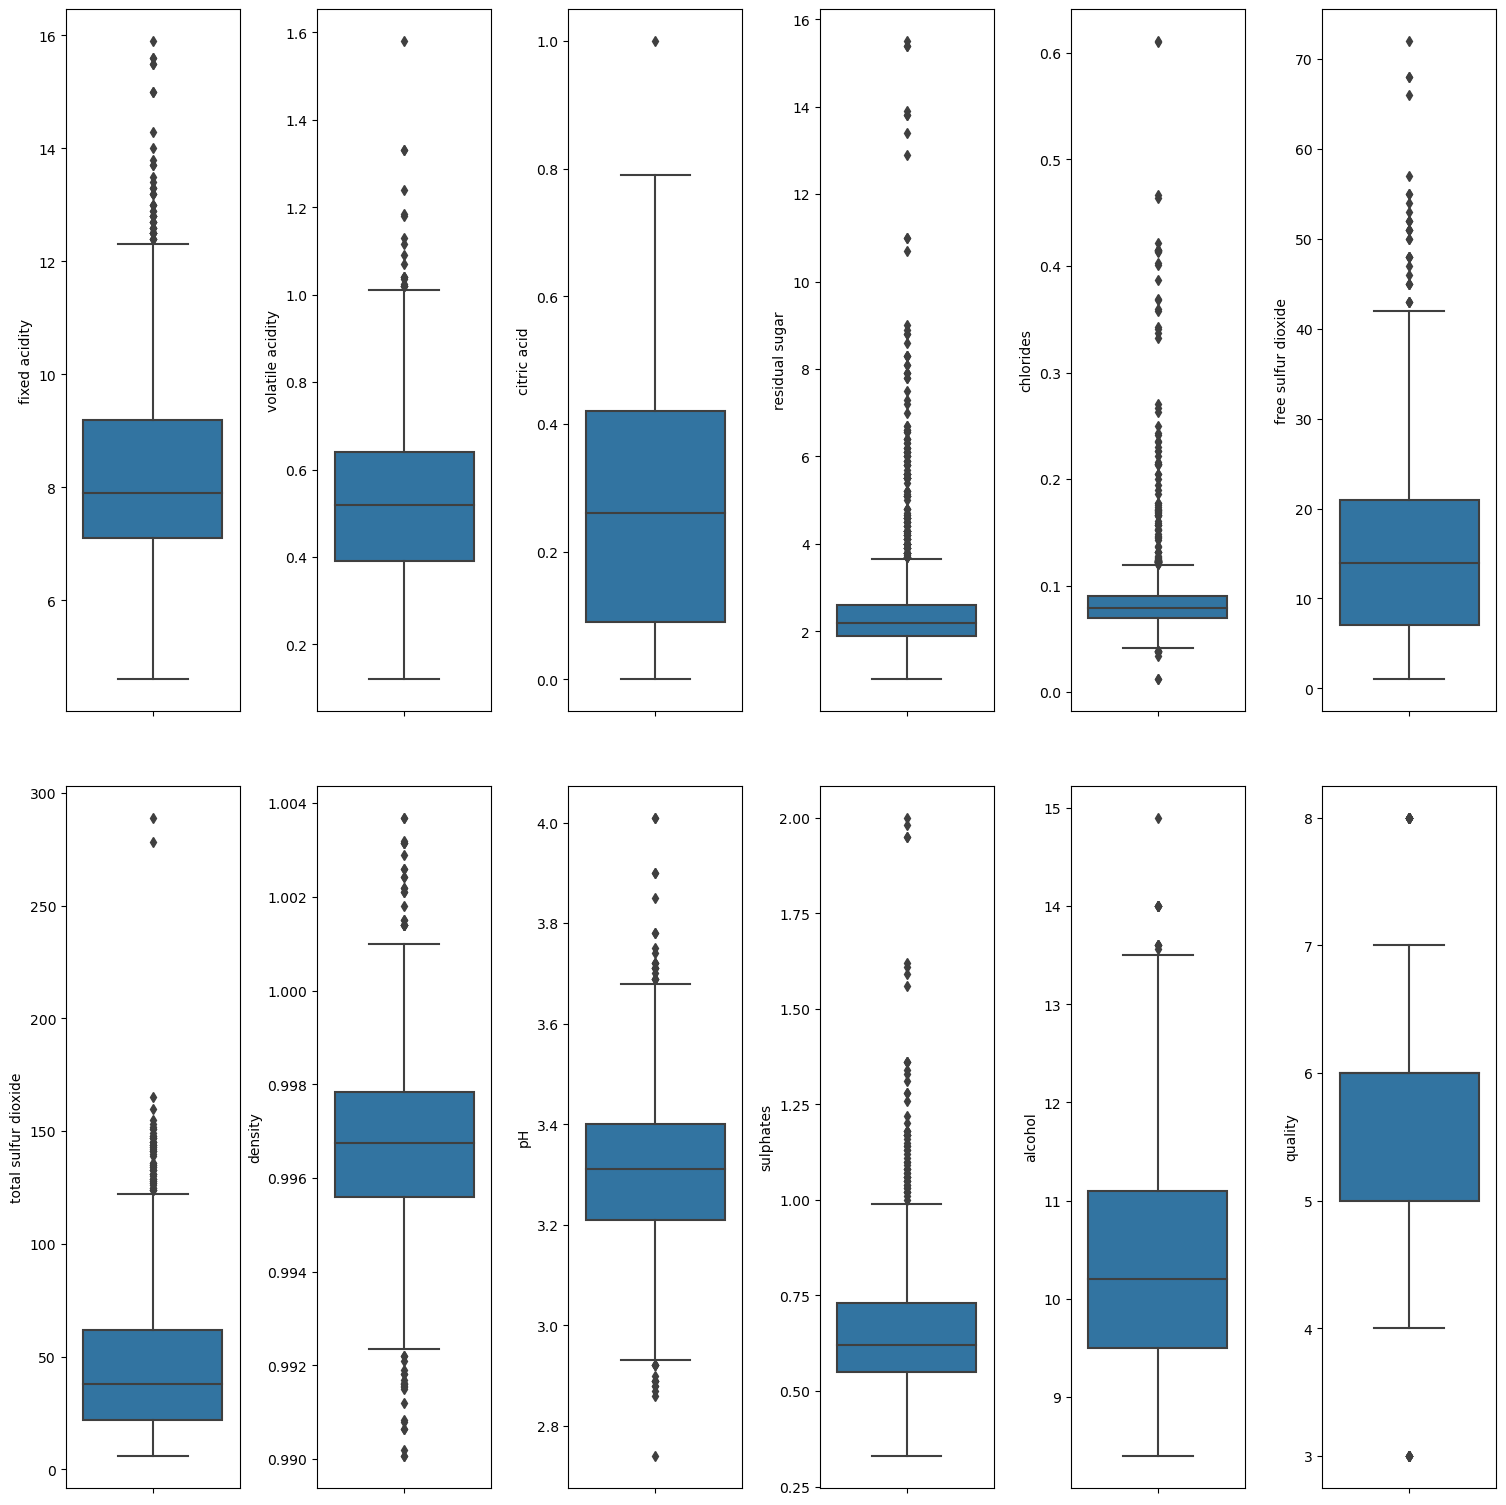

In [18]:
#create box plots
fig, ax= plt.subplots(ncols=6, nrows=2, figsize=(15,15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col,data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=5.0)        

# Feature Engineering

In [19]:
"""This code categorizes wine quality ratings into three groups and replaces the 'quality' column with a new 'rating' column in 
the DataFrame"""

rating = []

for i in df['quality']:
    if i >= 1 and i <= 3:
        rating.append('1')
    elif i >= 4 and i <= 7:
        rating.append('2')
    elif i >= 8 and i <= 10:
        rating.append('3')
df['rating'] = rating
df = df.drop("quality", axis =1)

In [20]:
# show dataset after creating new features (rating)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [21]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  rating                1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [22]:
# Convert the 'rating' from object to int
df['rating'] = df['rating'].astype(int)

In [23]:
# check summary or information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  rating                1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


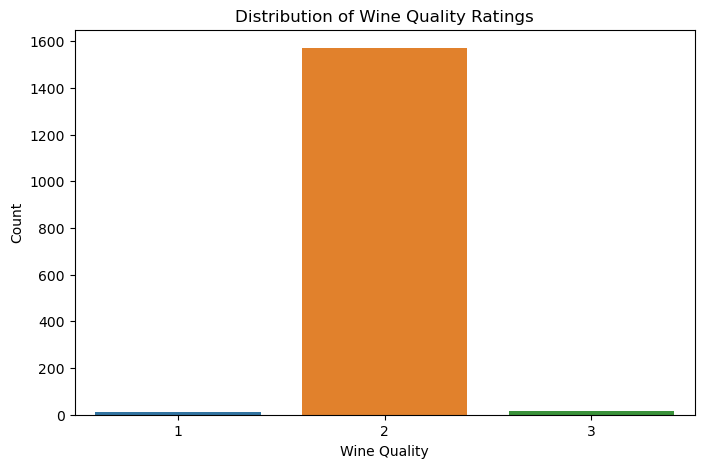

2    1571
3      18
1      10
Name: rating, dtype: int64

In [24]:
"""This code creates a countplot to visualize the distribution of wine quality ratings (categorized as 'rating') in the DataFrame 
'df' and displays the counts of each rating category along with a title"""

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Ratings')
plt.show()
df['rating'].value_counts()

In [25]:
# This code calculates the correlation between numeric columns in the DataFrame 'df' and returns a correlation matrix
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.010985
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.143929
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.076796
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.000874
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.069632
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,0.000905
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.002695
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.087215
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.050834
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.079677


In [26]:
# This code calculates the correlation of each numeric column with the 'rating' column in the DataFrame 'df'
df.corr()['rating']

fixed acidity           0.010985
volatile acidity       -0.143929
citric acid             0.076796
residual sugar         -0.000874
chlorides              -0.069632
free sulfur dioxide     0.000905
total sulfur dioxide   -0.002695
density                -0.087215
pH                     -0.050834
sulphates               0.079677
alcohol                 0.154340
rating                  1.000000
Name: rating, dtype: float64

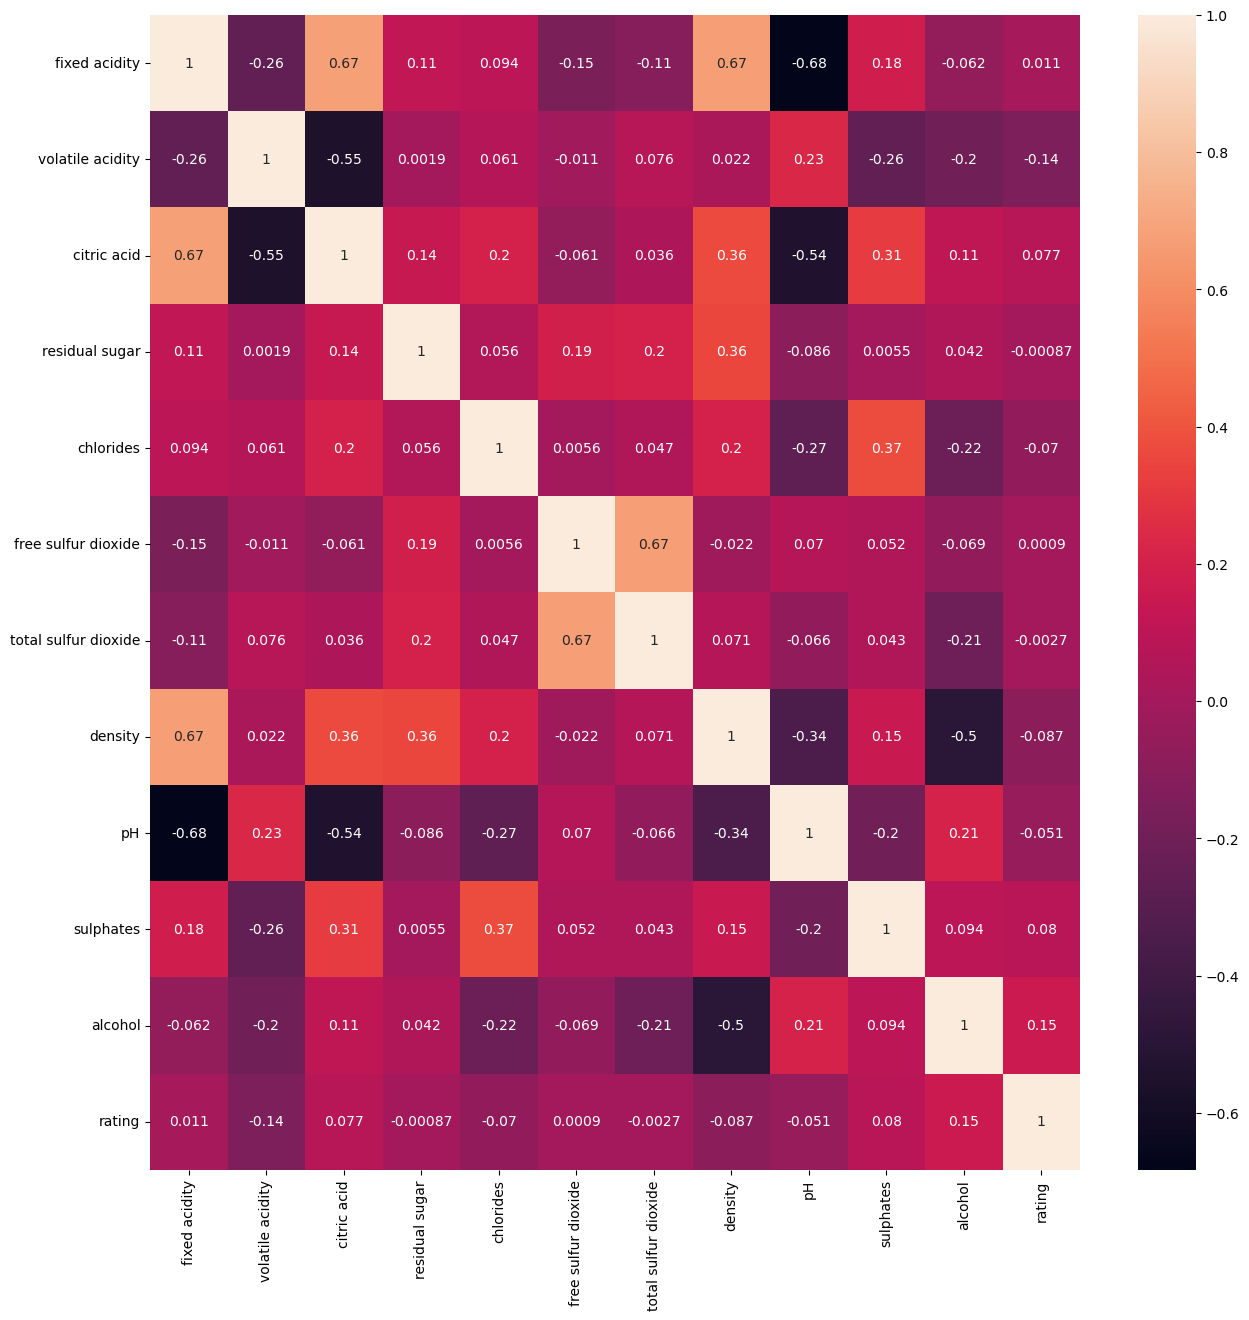

In [27]:
# This code creates a heatmap visualization of the correlation matrix for the DataFrame 'df' 
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [28]:
col = ['free sulfur dioxide', 'residual sugar']
df = df.drop(col, axis=1)

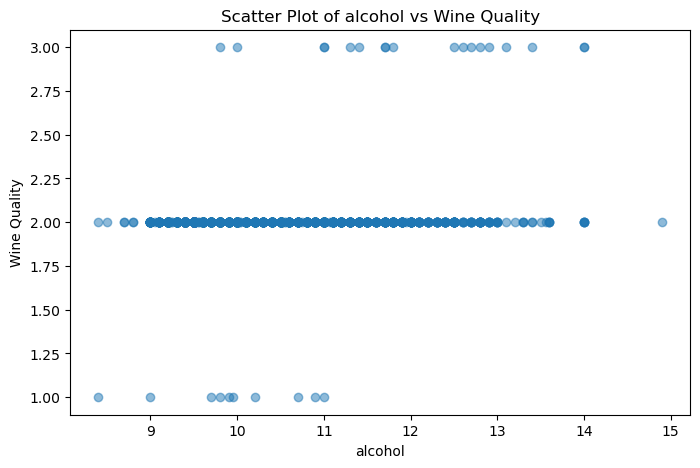

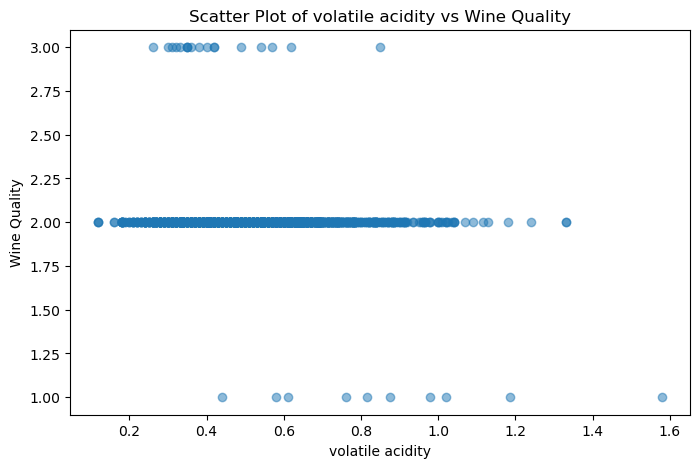

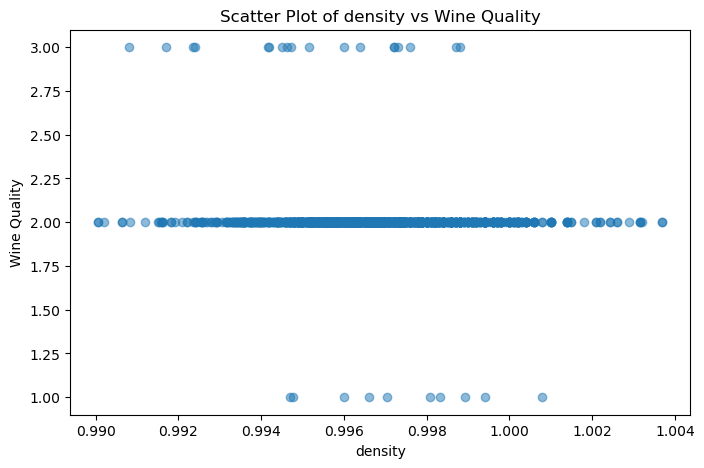

In [29]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the features with strong correlations with 'rating'
strong_correlations = correlation_matrix['rating'].abs().sort_values(ascending=False).index[1:]  # Exclude 'rating' itself

# Create scatter plots for the top N features with strong correlations
top_features = strong_correlations[:3]  # Adjust the number as needed

for feature in top_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['rating'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Wine Quality')
    plt.title(f'Scatter Plot of {feature} vs Wine Quality')
    plt.show()

In [30]:
# This code splits the 'df' data into input features (X) and the target variable (Y) for machine learning purposes
data = df.values
X = data[:,0:9]
Y = data[:,9]

In [31]:
"""his code creates additional synthetic data points to balance the target variable in a regression problem, making sure that 
all values are represented more equally"""

# X: Features, Y: Target variable
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)

# X_resampled and Y_resampled contain the balanced dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Standardization

In [33]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [34]:
# scaler.mean_ stores the means of the original features after scaling or standardization
scaler.mean_

array([ 8.47660472,  0.61437664,  0.28256598,  0.0943176 , 32.15420058,
        0.99657295,  3.32164284,  0.66151249, 10.80431442])

In [35]:
"""This code creates new DataFrames for scaled training and testing data (X_train_scaled and X_test_scaled) with column names 
preserved to match the original features in 'col_names"""

col_names = df.columns[:9]  

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

In [36]:
# X_train_scaled is a DataFrame containing the training data after it has been scaled or standardized
X_train_scaled

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.369488,-0.803504,0.269680,-0.586506,0.466631,-1.245392,1.480084,0.910469,2.075629
1,-0.642123,1.981548,-1.322137,0.079931,-0.680201,0.031160,1.933122,-0.795337,-0.093114
2,0.908070,-0.991634,1.063411,-0.475614,-0.222504,-0.104004,-1.630187,0.665213,-0.140334
3,2.657034,-0.086763,0.805763,-0.275214,-0.394225,1.806170,-2.047363,0.264922,-1.174786
4,0.800658,-0.379386,0.296035,1.625130,0.481856,0.576841,0.302427,0.930773,-0.720336
...,...,...,...,...,...,...,...,...,...
3765,0.279947,-0.737620,0.857490,-0.544906,-0.682582,-0.927716,-0.392656,0.196089,1.101305
3766,1.147140,-0.407095,0.661390,-0.565674,0.731666,0.857510,-1.028910,0.402589,0.543292
3767,0.776856,0.502938,0.527058,-0.581529,0.610474,1.359767,-0.288290,-0.690374,-1.168975
3768,1.037751,-1.006503,0.840628,-0.482776,-0.726763,0.313722,-0.601783,0.961263,1.391015


In [37]:
# X_test_scaled is a DataFrame containing the testing data after it has been scaled or standardized
X_test_scaled 

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.054790,0.126793,-1.263578,-0.364586,-0.665992,-0.839537,0.180503,-0.285744,-0.315747
1,-0.967648,0.876762,-1.293168,2.583185,0.092649,-0.640188,-0.028091,-0.966634,-0.805948
2,0.390056,-0.761611,1.044205,-0.520672,-0.627058,-1.032655,-0.710824,0.196673,1.325563
3,2.501294,-1.078304,2.047764,-0.497377,-0.127966,1.053581,-2.746180,1.067483,-0.748859
4,-0.803531,2.137740,-1.316983,0.366865,-0.847089,-0.664581,1.276973,-1.095358,-0.255517
...,...,...,...,...,...,...,...,...,...
938,-0.111106,0.215774,-0.108597,-0.230527,0.421075,0.541290,-0.074111,-0.905243,-1.252881
939,-0.843291,-0.782397,0.195303,-0.606356,0.805932,-0.707082,0.484375,1.278627,1.856770
940,-0.670122,1.254006,-1.043088,-0.632778,0.607963,0.295943,-0.108433,-0.747782,-0.898903
941,-0.236931,0.162385,-0.301094,-0.565674,-0.355401,0.119663,-0.137764,3.706585,-0.393842


In [38]:
# Convert the NumPy array X_train back to a Pandas DataFrame with column names
X_train = pd.DataFrame(X_train, columns=col_names)

# Use the .describe() function on the Pandas DataFrame
description = X_train.describe()

In [39]:
"""description is a DataFrame containing summary statistics of the features in the training data 'X_train,' such as count, mean,
standard deviation, minimum, and maximum values"""

description

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,8.476605,0.614377,0.282566,0.094318,32.154201,0.996573,3.321643,0.661512,10.804314
std,1.589726,0.280995,0.207823,0.044762,25.760799,0.001898,0.157122,0.145298,1.280670
min,4.900000,0.120000,0.000000,0.012000,6.000000,0.990070,2.870000,0.330000,8.400000
25%,7.300000,0.382941,0.057879,0.070666,14.261538,0.995390,3.208791,0.550349,9.800000
50%,8.121423,0.547787,0.300000,0.079513,22.000000,0.996700,3.310000,0.650000,10.600000
75%,9.621005,0.780177,0.460000,0.098000,43.818404,0.997858,3.439674,0.750435,11.771737
max,15.900000,1.580000,0.790000,0.611000,289.000000,1.003690,4.010000,1.980000,14.900000


In [40]:
"""This code displays rounded summary statistics for the scaled training data, providing insight into key characteristics of the
features"""

np.round(X_train_scaled.describe(), 1)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
count,3770.0,3770.0,3770.0,3770.0,3770.0,3770.0,3770.0,3770.0,3770.0
mean,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.3,-1.8,-1.4,-1.8,-1.0,-3.4,-2.9,-2.3,-1.9
25%,-0.7,-0.8,-1.1,-0.5,-0.7,-0.6,-0.7,-0.8,-0.8
50%,-0.2,-0.2,0.1,-0.3,-0.4,0.1,-0.1,-0.1,-0.2
75%,0.7,0.6,0.9,0.1,0.5,0.7,0.8,0.6,0.8
max,4.7,3.4,2.4,11.5,10.0,3.8,4.4,9.1,3.2


In [41]:
# This code provides rounded summary statistics for the scaled testing data, offering an overview of feature characteristics
np.round(X_test_scaled.describe(), 1)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
count,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0,943.0
mean,-0.1,0.0,-0.0,0.0,0.1,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.1,1.0,1.1,1.0,1.0,1.0
min,-2.4,-1.8,-1.4,-1.2,-1.0,-3.4,-3.7,-1.8,-1.9
25%,-0.7,-0.8,-1.0,-0.5,-0.7,-0.7,-0.7,-0.8,-0.8
50%,-0.2,-0.2,0.1,-0.3,-0.3,0.0,-0.1,-0.2,-0.1
75%,0.7,0.6,0.8,0.1,0.6,0.7,0.8,0.6,0.8
max,4.4,3.4,3.5,11.5,5.2,3.5,4.4,9.2,2.5


# Linear Regression Algorithm

In [42]:
"""This code initializes two linear regression models: 'lr' for the original data and 'lr_scaled' for data that has been scaled 
or standardized"""

lr = LinearRegression()
lr_scaled = LinearRegression()

In [43]:
"""These lines of code train two linear regression models: 'lr' on the original training data, and 'lr_scaled' on the scaled or 
standardized training data"""

# train model
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:
"""These lines of code generate predictions using two linear regression models, one for the original data and one for the scaled
data, on the respective testing sets"""

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
"""These lines of code compute and compare the mean absolute errors (MAE) for predictions made by two linear regression models, 
one on the original data and one on the scaled data, to evaluate their prediction accuracy"""

mae1 = mean_absolute_error(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred_scaled)

In [46]:
# printing values
mae1, mae2

(0.27161370687544906, 0.27161370687543923)

In [47]:
"""'mse1' and 'mse2' are used to compute the mean squared errors for predictions made by two different regression models, 
allowing us to assess their prediction accuracy with an emphasis on larger errors"""

mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred_scaled)

In [48]:
# printing values
mse1, mse2

(0.12551547521440956, 0.12551547521440726)

In [49]:
"""'rmse1' and 'rmse2' are numbers that tell us how different regression models are performing in making predictions. They focus 
on the accuracy of predictions, considering larger errors and are presented in the same unit as the target variable"""

rmse1 = sqrt(mse1)
rmse2 = sqrt(mse2)

In [50]:
# printing values
rmse1, rmse2

(0.3542816326235521, 0.3542816326235489)

In [51]:
"""'r1' and 'r2' are numbers that show how well two different regression models can explain or predict the variance in their 
respective sets of data, with 'r1' for the original data and 'r2' for the scaled data"""

r1 = r2_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred_scaled)

In [52]:
# printing values
r1, r2

(0.8077905140436953, 0.8077905140436988)

In [53]:
# displaying the size
X_test.shape, X_test_scaled.shape

((943, 9), (943, 9))

In [54]:
# creating variables to store number of rows and columns
n = 943
k = 9

In [55]:
# calculating the adjusted r2 score for both original and scaled data
adjusted_r2_score1 = 1 - (((1 - r1) * (n - 1)) / (n - 1 - k))
adjusted_r2_score2 = 1 - (((1 - r2) * (n - 1)) / (n - 1 - k))

In [56]:
# displaying the adjusted r2 score for both original and scaled data
adjusted_r2_score1, adjusted_r2_score2 

(0.8059364032466891, 0.8059364032466927)

In [57]:
# This code displays the first two rows of the DataFrame 'df', providing a quick glimpse of the data's structure and content
df.head(8)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,rating
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,0.075,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,0.069,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,0.065,21.0,0.9946,3.39,0.47,10.0,2


In [58]:
# This code processes input data, feeds it to a linear regression model, and prints the model's prediction for the given input
input_data = (7.3, 0.65, 0.00, 0.065, 21.0, 0.9946, 3.39, 0.47, 10.0)

input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction_1 = lr.predict(input_data_reshaped)
prediction_2 = lr_scaled.predict(input_data_reshaped)

print(prediction_1)
print(prediction_2)

[1.70382282]
[3.3803295]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Random Forest Regressor Algorithm

In [59]:
"""This code initializes and trains a Random Forest regression model with 100 estimators, makes predictions, and calculates 
evaluation metrics including MAE, MSE, R2 score, and RMSE, then prints the results to assess the model's performance"""

rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf.fit(X_train_scaled, y_train)

# Make predictions using the Random Forest model
y_pred_rf = rf.predict(X_test_scaled)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)
adjusted_r2_score = 1 - (((1 - r2_rf) * (n - 1)) / (n - 1 - k))

print("Random Forest Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)

print("R-squared (R2) Score:", r2_rf)
print("adjusted r2 score:", adjusted_r2_score)

Random Forest Regression Metrics:
Mean Absolute Error (MAE): 0.03738069989395545
Mean Squared Error (MSE): 0.014671367974549307
Root Mean Squared Error (RMSE): 0.12112542249482272
R-squared (R2) Score: 0.9775328413341324
adjusted r2 score: 0.9773161163309247


In [60]:
"""This code uses a trained Random Forest regression model to predict an output value for a given input data and prints the 
prediction result"""

input_data = (7.3, 0.65, 0.00, 0.065, 21.0, 0.9946, 3.39, 0.47, 10.0)

input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

[2.08]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
